In [4]:
import pandas as pd
import numpy as np



[[3.68720965e-04 5.28820281e-04 5.06969005e-04 ... 3.62449605e-04
  4.50718148e-05 1.09574063e-04]
 [5.92428918e-05 2.29059000e-05 3.07794406e-04 ... 3.38026170e-04
  3.61602394e-04 4.00857203e-04]
 [2.79733341e-05 3.31197282e-05 2.37721201e-04 ... 7.22295801e-04
  8.76966115e-05 1.46146253e-04]
 ...
 [1.60725423e-04 4.08142296e-05 5.46737135e-05 ... 1.72083859e-05
  1.35702328e-04 1.21094058e-05]
 [1.03719781e-04 5.53290229e-05 5.74210574e-05 ... 2.38046962e-04
  1.45573655e-04 4.65041010e-05]
 [1.51884975e-04 1.04131314e-03 1.62255063e-05 ... 5.27599786e-04
  2.63188151e-04 5.76879321e-05]]


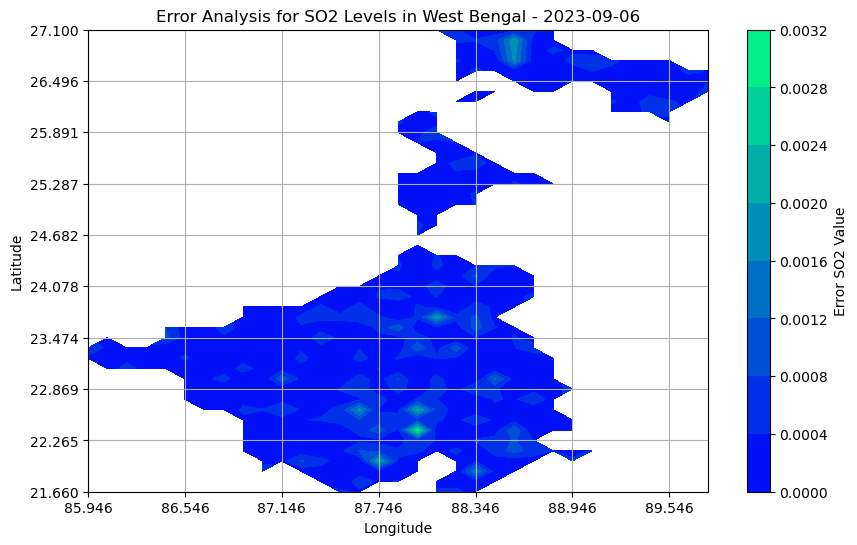

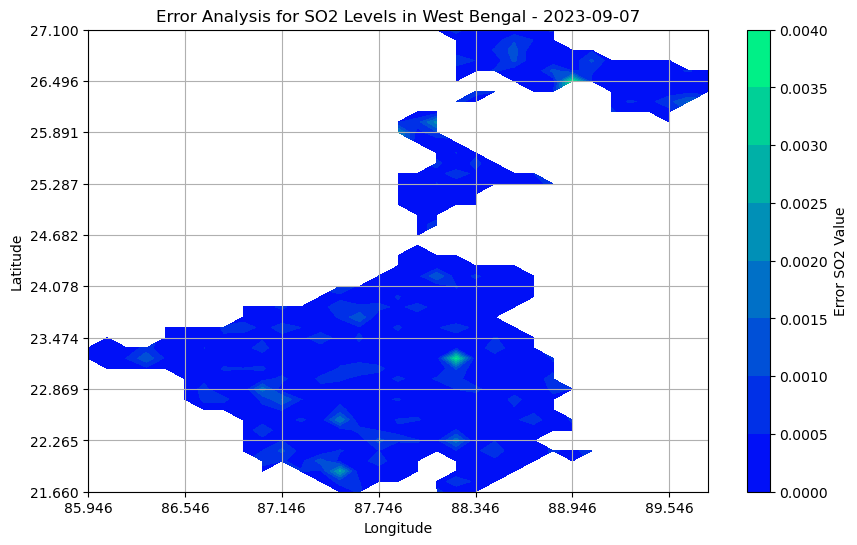

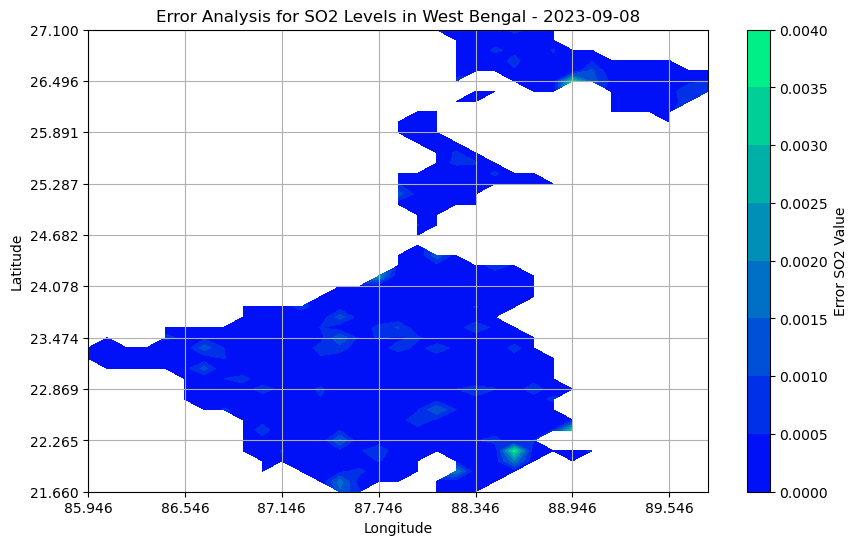

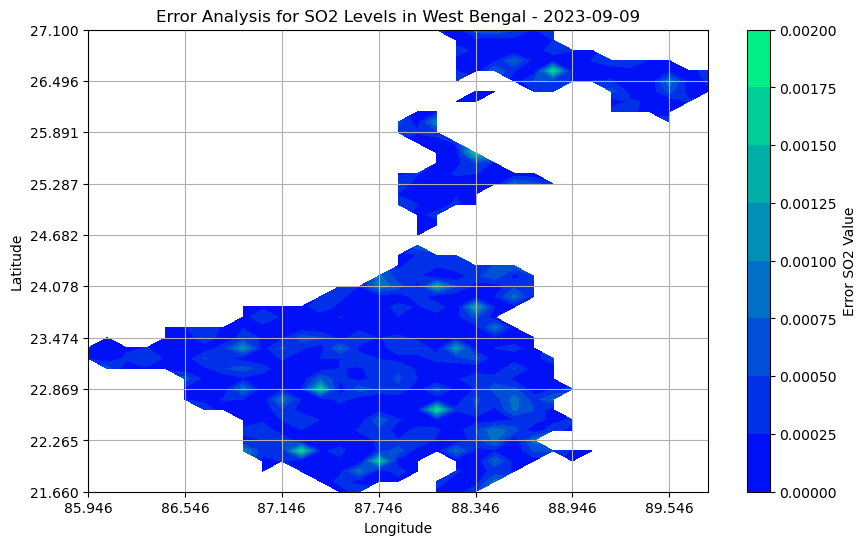

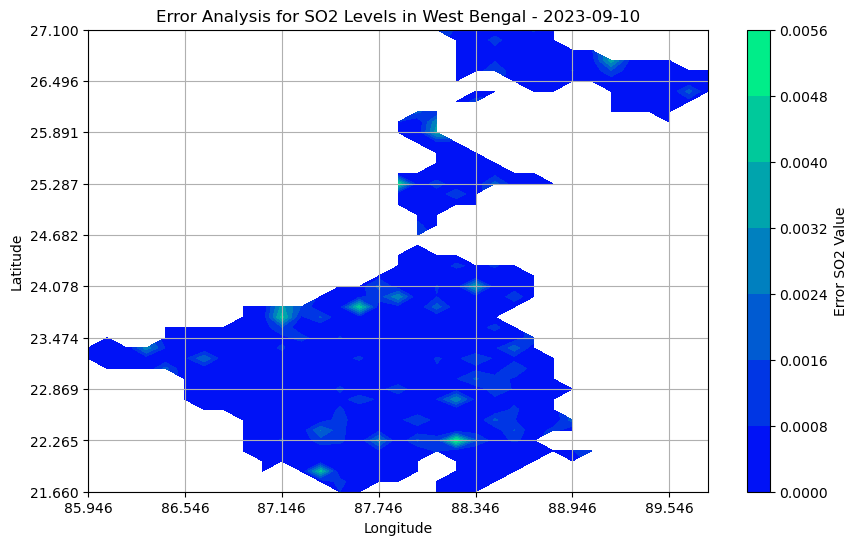

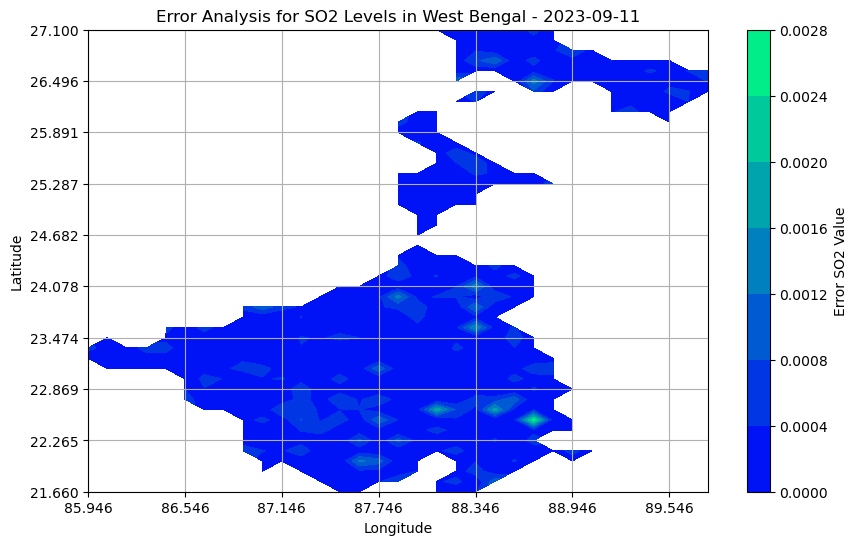

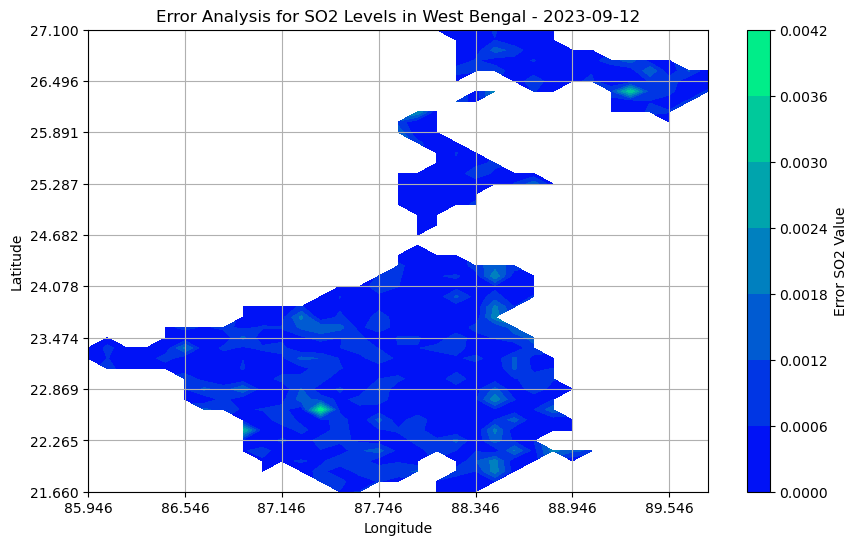

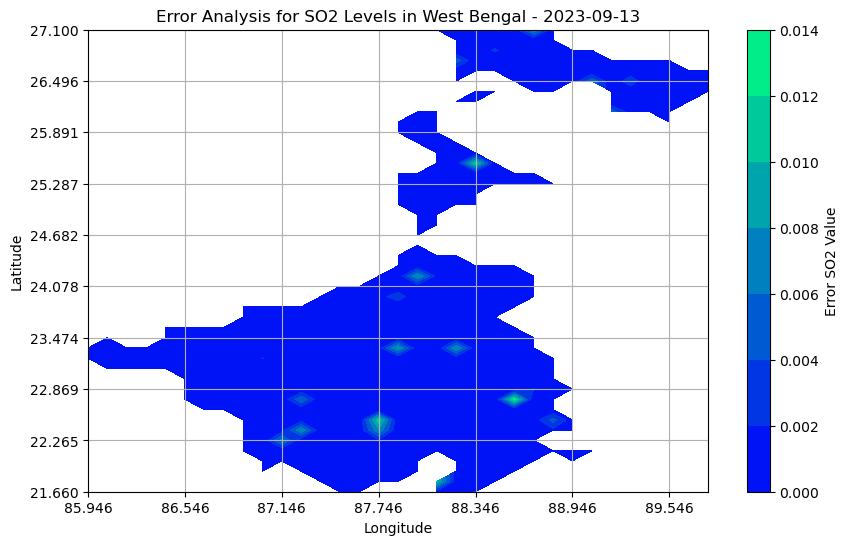

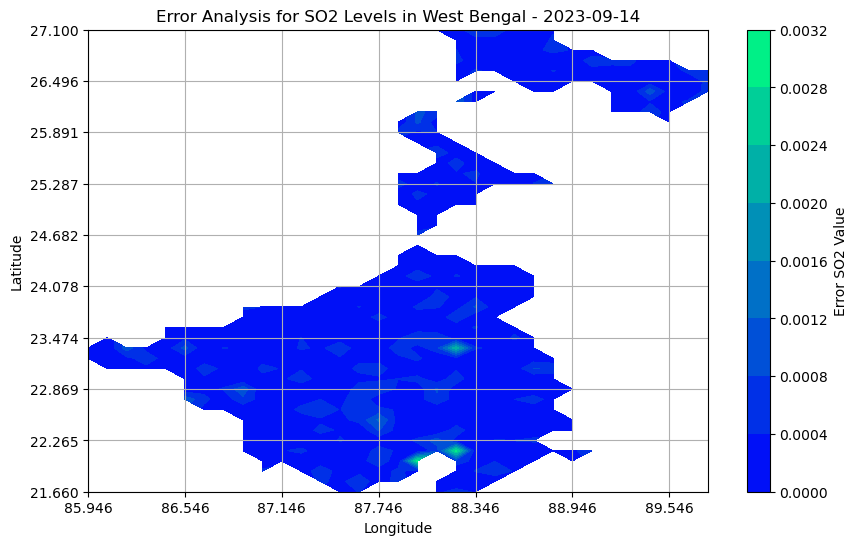

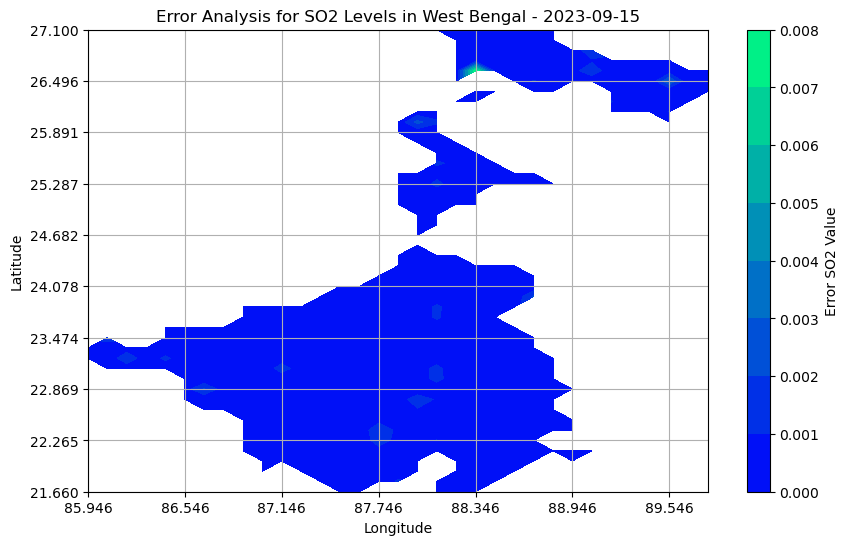

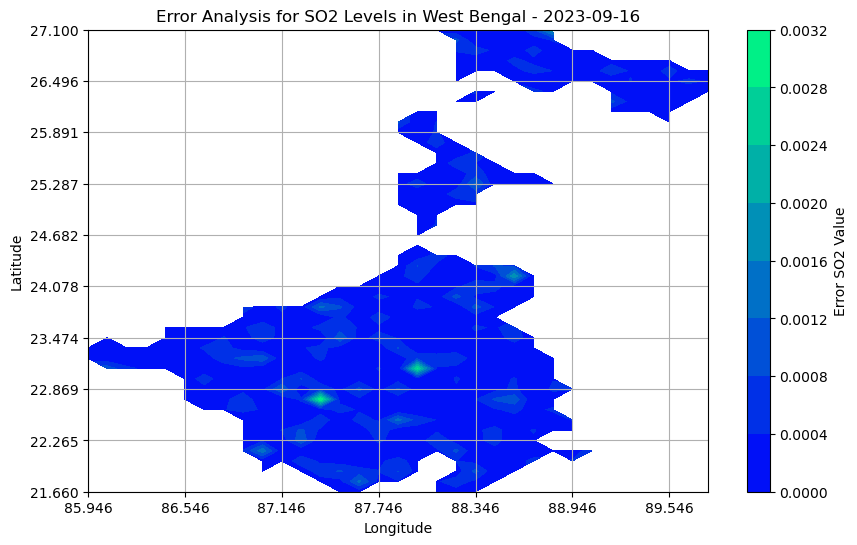

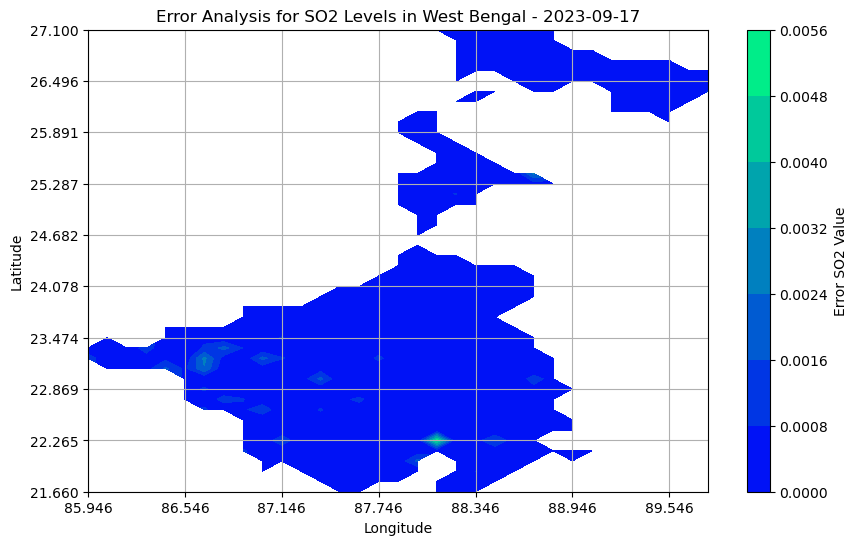

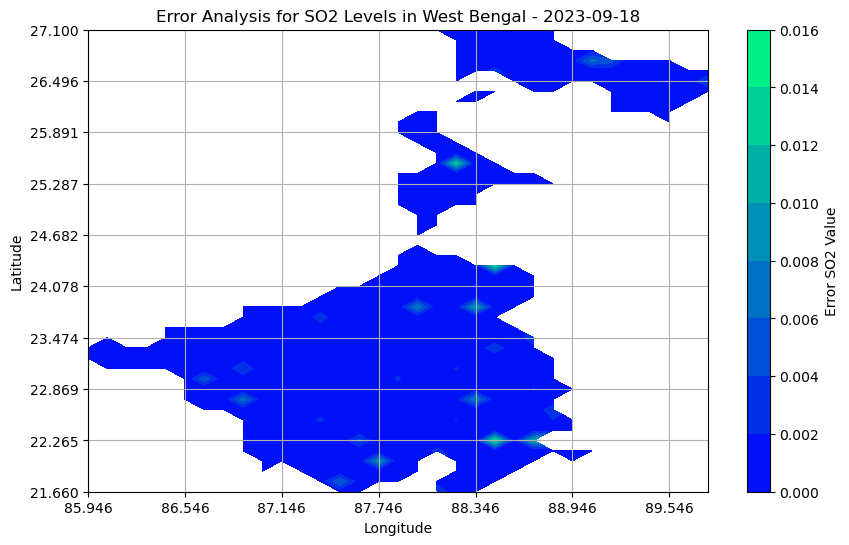

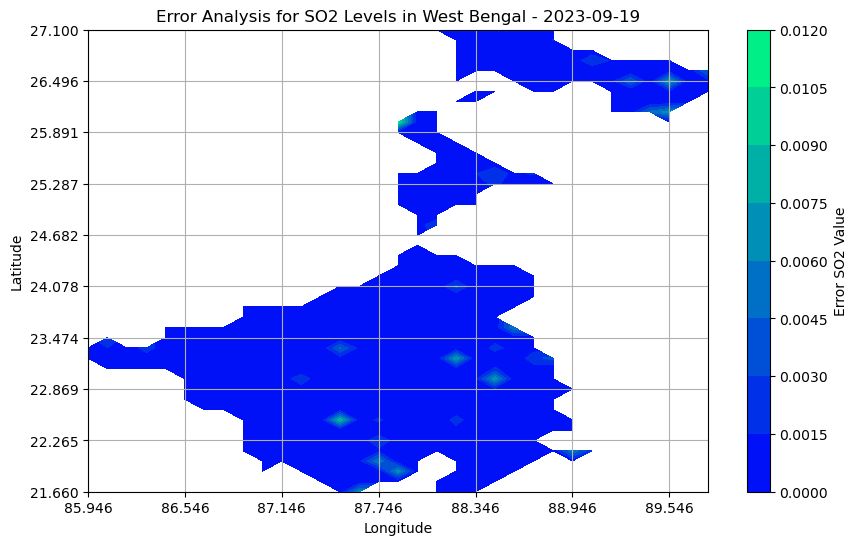

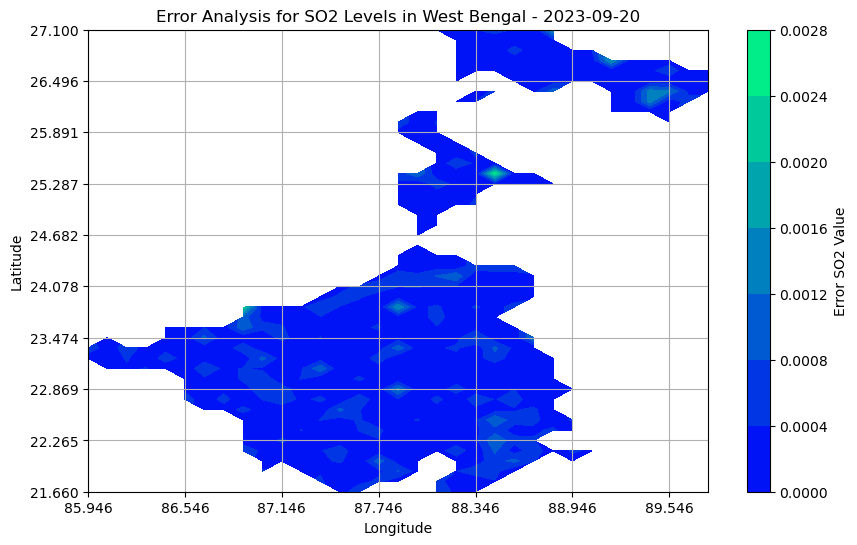

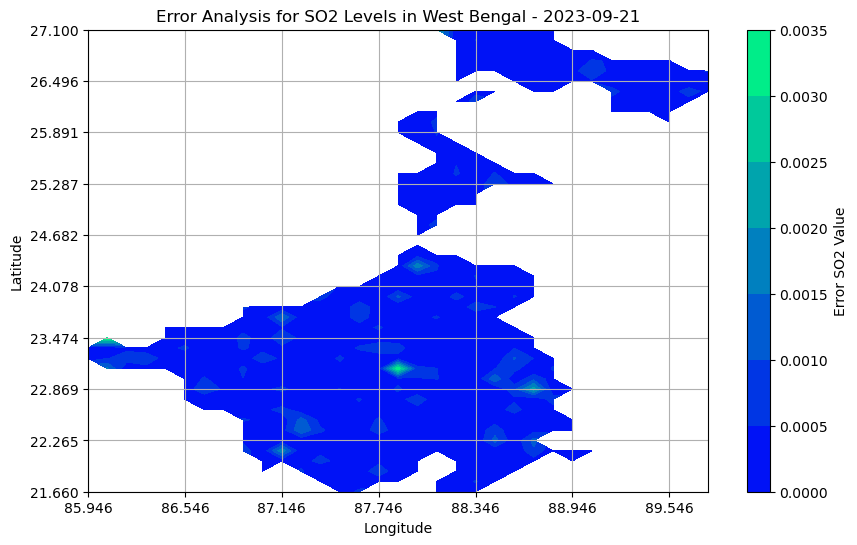

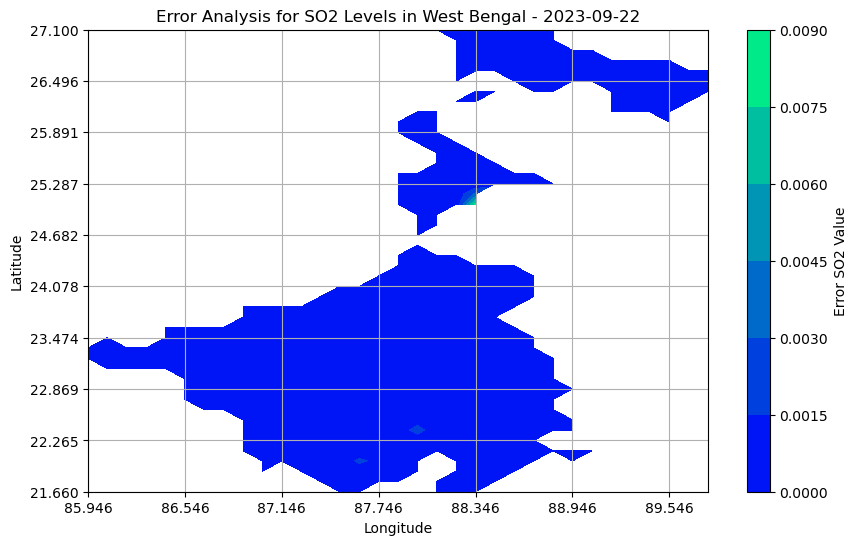

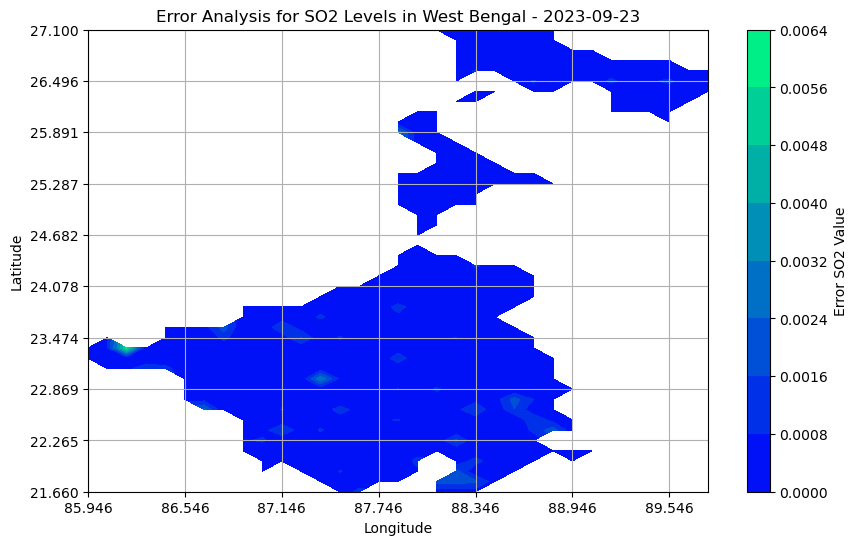

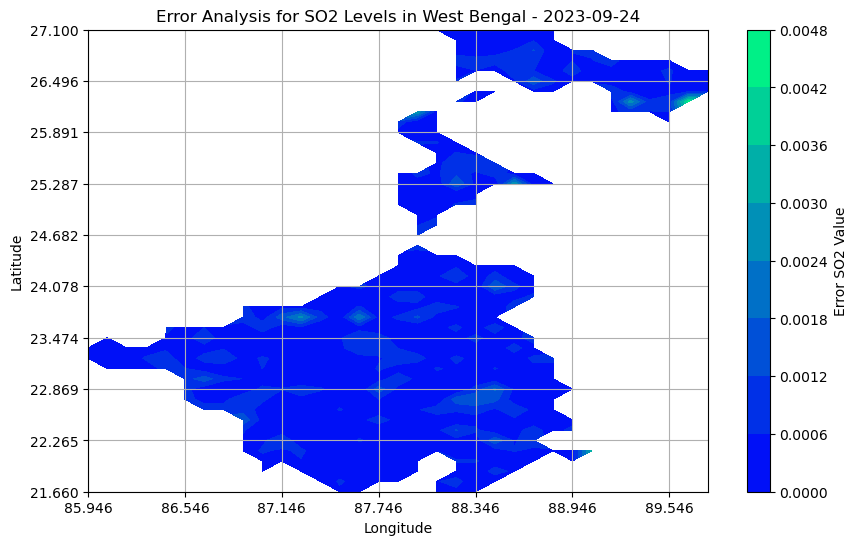

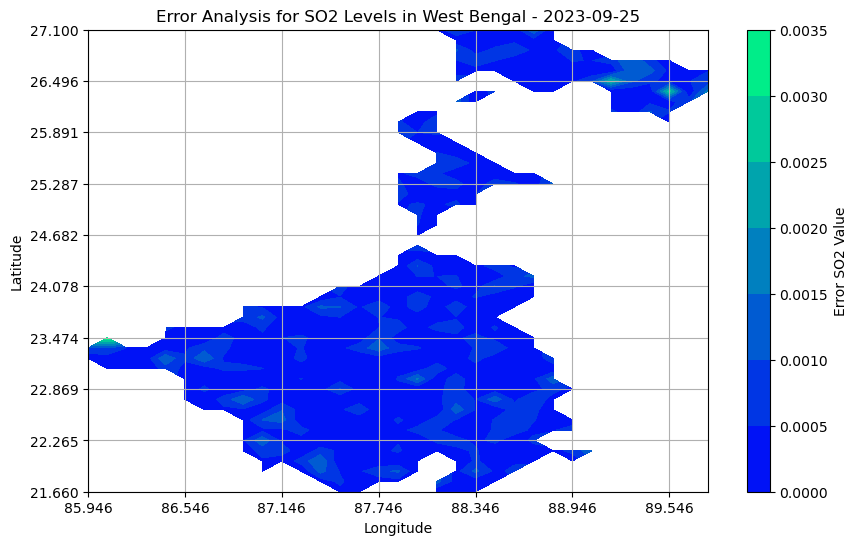

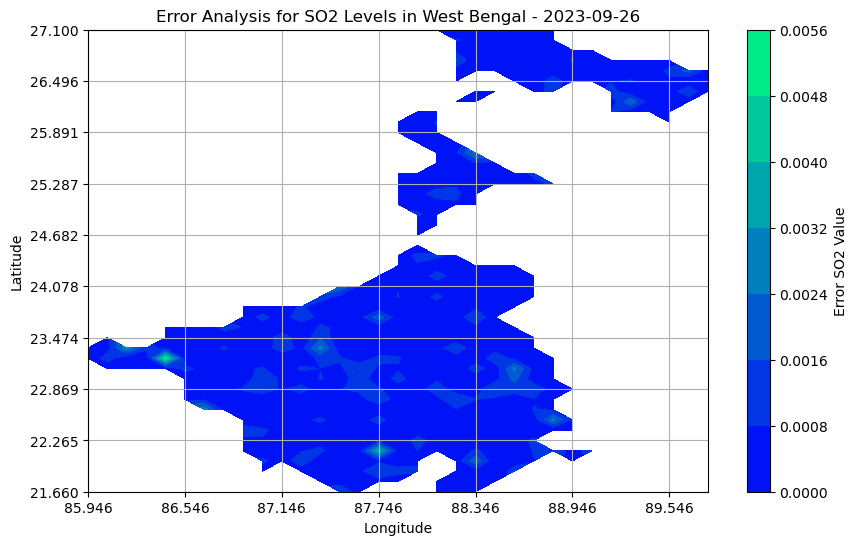

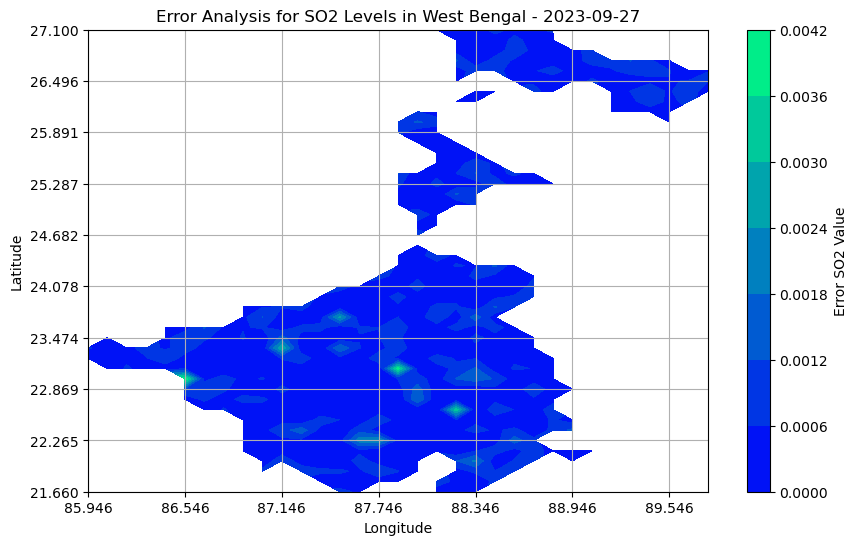

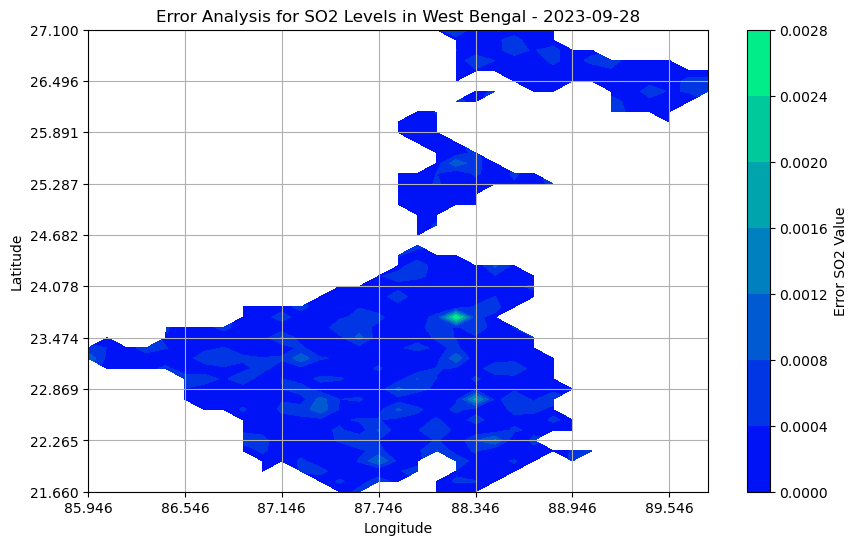

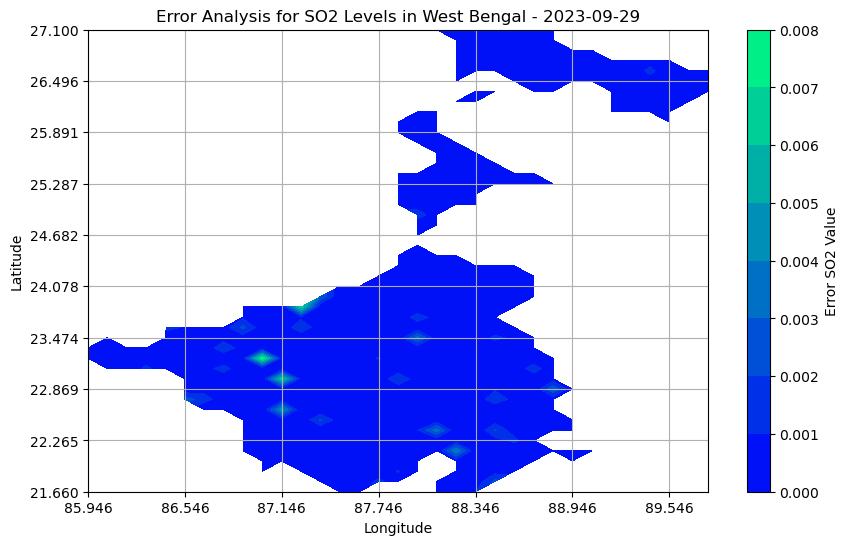

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load kriging data for SO2 in West Bengal
krig_wb_so2 = pd.read_csv("/home/sysadm/Downloads/wb/Wb_2023_sep_So2_final.csv")
krig_wb_so2
kriging_remove_wb_so2 = krig_wb_so2.drop(columns=["latitude", "longitude", "2023-09-01", "2023-09-02", "2023-09-03", "2023-09-04", "2023-09-05"])

# Load LSTM predicted data for SO2 in West Bengal
lstm_wb_so2 = pd.read_csv("/home/sysadm/Downloads/wb/Wb_so2/relu_predicted_6_30_so2.csv")
lstm_wb_so2.index = lstm_wb_so2["date"]
lstm_wb_so2 = lstm_wb_so2.drop(columns=['date'])

# Transpose LSTM predictions for SO2 in West Bengal
relu_predicted_wb_so2 = lstm_wb_so2.transpose()
df_wb_so2 = relu_predicted_wb_so2
kriging_remove_wb_so2.index = relu_predicted_wb_so2.index
df1_wb_so2 = kriging_remove_wb_so2.to_numpy()
df2_wb_so2 = relu_predicted_wb_so2.to_numpy()
result_df_numpy_wb_so2 = df1_wb_so2 - df2_wb_so2

# Calculate the absolute value of each element
abs_array_wb_so2 = np.abs(result_df_numpy_wb_so2)

# Print or use the result array as needed
print(abs_array_wb_so2)

abs_array_df_wb_so2 = pd.DataFrame(abs_array_wb_so2, columns=relu_predicted_wb_so2.columns)
abs_array_df_wb_so2["longitude"] = krig_wb_so2["longitude"]
abs_array_df_wb_so2["latitude"] = krig_wb_so2["latitude"]
result_df_wb_so2 = abs_array_df_wb_so2

import geopandas as gpd
import matplotlib.pyplot as plt

df2_wb_so2 = result_df_wb_so2

# Assuming your DataFrame is named 'your_dataframe'
# Replace 'your_dataframe' with your actual DataFrame name
gdf_wb_so2 = gpd.GeoDataFrame(df2_wb_so2, geometry=gpd.points_from_xy(df2_wb_so2['longitude'], df2_wb_so2['latitude']))

# Replace 'your_shapefile.shp' with your actual file path for West Bengal
shapefile_path_wb_so2 = './West_Bengal_shape_file/West_Bengal.shp'
basemap_wb_so2 = gpd.read_file(shapefile_path_wb_so2)

# Check if points are within the shapefile boundary
points_within_shapefile_wb_so2 = gdf_wb_so2[gdf_wb_so2.geometry.within(basemap_wb_so2.unary_union)]
gdf_within_shapefile_wb_so2 = points_within_shapefile_wb_so2.reset_index(drop=True)  # Reset the index to avoid potential issues

# Now you can use gdf_within_shapefile_wb_so2 for further analysis or visualization

result_df_wb_so2 = gdf_within_shapefile_wb_so2

# Iterate through each date column in the DataFrame
for column in result_df_wb_so2.columns[0:-3]:  # Exclude latitude and longitude columns
    # Check if the entire column has NaN values
    if not result_df_wb_so2[column].isnull().all():
        # Extract only the date part from the datetime string
        date_only_wb_so2 = pd.to_datetime(column).date()

        # Pivot the DataFrame for the specific date
        heatmap_data_wb_so2 = result_df_wb_so2.pivot(index='latitude', columns='longitude', values=column)

        # Create a contour plot if there are no NaN values for the specific date
        if not heatmap_data_wb_so2.isnull().values.all():
            plt.figure(figsize=(10, 6))
            contour_wb_so2 = plt.contourf(heatmap_data_wb_so2.columns, heatmap_data_wb_so2.index, heatmap_data_wb_so2.values, cmap='winter')
            plt.colorbar(contour_wb_so2, label='Error SO2 Value')
            plt.xticks(heatmap_data_wb_so2.columns[::5])
            plt.yticks(heatmap_data_wb_so2.index[::5])
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.title(f'Error Analysis for SO2 Levels in West Bengal - {date_only_wb_so2}')
            plt.grid()
            plt.savefig(f'/home/sysadm/Downloads/wb/Wb_so2/error_plot/Error Analysis for SO2_plot_heat_{date_only_wb_so2}_wb.png')
            plt.show()


In [6]:

# Load kriging data for SO2 in West Bengal
krig_wb_so2 = pd.read_csv("/home/sysadm/Downloads/wb/Wb_2023_sep_So2_final.csv")
krig_wb_so2
kriging_remove_wb_so2 = krig_wb_so2.drop(columns=["latitude", "longitude", "2023-09-01", "2023-09-02", "2023-09-03", "2023-09-04", "2023-09-05"])

# Load LSTM predicted data for SO2 in West Bengal
lstm_wb_so2 = pd.read_csv("/home/sysadm/Downloads/wb/Wb_so2/relu_predicted_6_30_so2.csv")
lstm_wb_so2.index = lstm_wb_so2["date"]
lstm_wb_so2 = lstm_wb_so2.drop(columns=['date'])

# Transpose LSTM predictions for SO2 in West Bengal
relu_predicted_wb_so2 = lstm_wb_so2.transpose()
df_wb_so2 = relu_predicted_wb_so2
kriging_remove_wb_so2.index = relu_predicted_wb_so2.index
df1_wb_so2 = kriging_remove_wb_so2.to_numpy()
df2_wb_so2 = relu_predicted_wb_so2.to_numpy()
result_df_numpy_wb_so2 = df1_wb_so2 - df2_wb_so2

# Calculate the absolute value of each element
abs_array_wb_so2 = np.abs(result_df_numpy_wb_so2)

# Print or use the result array as needed
print(abs_array_wb_so2)

abs_array_df_wb_so2 = pd.DataFrame(abs_array_wb_so2, columns=relu_predicted_wb_so2.columns)
abs_array_df_wb_so2["longitude"] = krig_wb_so2["longitude"]
abs_array_df_wb_so2["latitude"] = krig_wb_so2["latitude"]
result_df_wb_so2 = abs_array_df_wb_so2
# Assuming your DataFrame is named 'df'
columns_to_include = abs_array_df_wb_so2.columns.difference(['latitude', 'longitude'])

abs_array_df_wb_so2['mean_value'] = abs_array_df_wb_so2[columns_to_include].mean(axis=1)

result_df = abs_array_df_wb_so2[['latitude', 'longitude', 'mean_value']]

[[3.68720965e-04 5.28820281e-04 5.06969005e-04 ... 3.62449605e-04
  4.50718148e-05 1.09574063e-04]
 [5.92428918e-05 2.29059000e-05 3.07794406e-04 ... 3.38026170e-04
  3.61602394e-04 4.00857203e-04]
 [2.79733341e-05 3.31197282e-05 2.37721201e-04 ... 7.22295801e-04
  8.76966115e-05 1.46146253e-04]
 ...
 [1.60725423e-04 4.08142296e-05 5.46737135e-05 ... 1.72083859e-05
  1.35702328e-04 1.21094058e-05]
 [1.03719781e-04 5.53290229e-05 5.74210574e-05 ... 2.38046962e-04
  1.45573655e-04 4.65041010e-05]
 [1.51884975e-04 1.04131314e-03 1.62255063e-05 ... 5.27599786e-04
  2.63188151e-04 5.76879321e-05]]


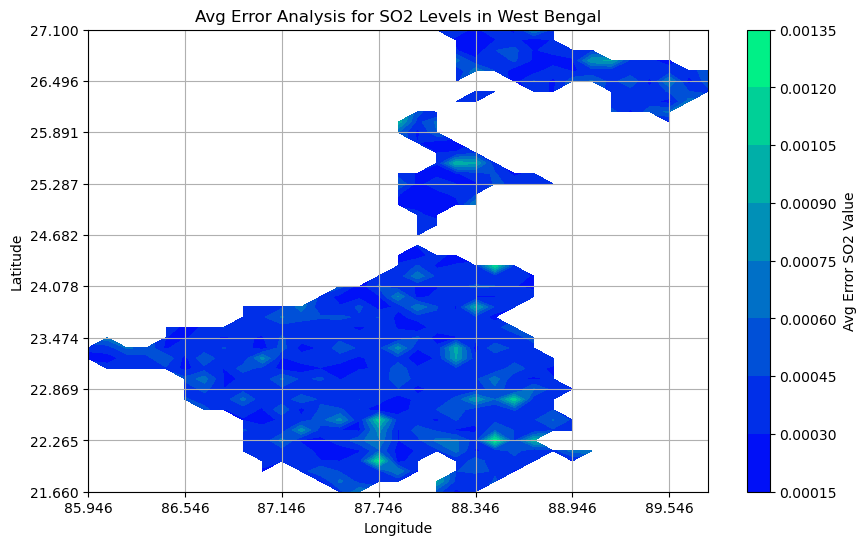

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

df2_wb_so2 = result_df

# Assuming your DataFrame is named 'your_dataframe'
# Replace 'your_dataframe' with your actual DataFrame name
gdf_wb_so2 = gpd.GeoDataFrame(df2_wb_so2, geometry=gpd.points_from_xy(df2_wb_so2['longitude'], df2_wb_so2['latitude']))

# Replace 'your_shapefile.shp' with your actual file path for West Bengal
shapefile_path_wb_so2 = './West_Bengal_shape_file/West_Bengal.shp'
basemap_wb_so2 = gpd.read_file(shapefile_path_wb_so2)

# Check if points are within the shapefile boundary
points_within_shapefile_wb_so2 = gdf_wb_so2[gdf_wb_so2.geometry.within(basemap_wb_so2.unary_union)]
gdf_within_shapefile_wb_so2 = points_within_shapefile_wb_so2.reset_index(drop=True)  # Reset the index to avoid potential issues

# Now you can use gdf_within_shapefile_wb_so2 for further analysis or visualization

result_df_wb_so2 = gdf_within_shapefile_wb_so2

# Iterate through each date column in the DataFrame
for column in result_df_wb_so2.columns[2:3]:  # Exclude latitude and longitude columns
    # Check if the entire column has NaN values
    if not result_df_wb_so2[column].isnull().all():
        # Extract only the date part from the datetime string
        #date_only_wb_so2 = pd.to_datetime(column).date()

        # Pivot the DataFrame for the specific date
        heatmap_data_wb_so2 = result_df_wb_so2.pivot(index='latitude', columns='longitude', values=column)

        # Create a contour plot if there are no NaN values for the specific date
        if not heatmap_data_wb_so2.isnull().values.all():
            plt.figure(figsize=(10, 6))
            contour_wb_so2 = plt.contourf(heatmap_data_wb_so2.columns, heatmap_data_wb_so2.index, heatmap_data_wb_so2.values, cmap='winter')
            plt.colorbar(contour_wb_so2, label='Avg Error SO2 Value')
            plt.xticks(heatmap_data_wb_so2.columns[::5])
            plt.yticks(heatmap_data_wb_so2.index[::5])
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.title(f'Avg Error Analysis for SO2 Levels in West Bengal')
            plt.grid()
            plt.savefig(f'/home/sysadm/Downloads/Avg_Error Analysis for SO2_plot_heat_wb.png')
            plt.show()
